In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
# Read the excel file into a pandas DataFrame

newdata = pd.read_excel('new_combined_data_test.xls')
newdata.set_index('State', inplace=True)
newdata.head()

,net 2011,avg. home prices
State,,
.Alabama,13632,117503.7500
.Alaska,8218,256963.8333
.Arizona,65471,139398.3333
.Arkansas,18703,104691.0833
.California,318867,312440.0000


In [39]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = alldata["avg. home prices"].values.reshape(-1, 1)
y = alldata["net 2011"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (459, 1) (459, 1)


Text(0, 0.5, 'Net Migration')

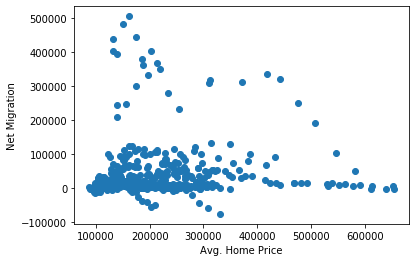

In [40]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Avg. Home Price")
plt.ylabel("Net Migration")

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [42]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [43]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.05246212]]
y-axis intercept:  [28897.16189168]


In [45]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[88026.91667]]
Max X Value: [[653839.7273]]


In [46]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Net Migration')

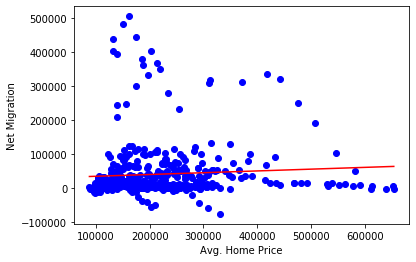

In [47]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Avg. Home Price")
plt.ylabel("Net Migration")

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 6927473279.7044935
R-squared (R2 ): -0.007700200651180156


In [49]:
model.score(X_test, y_test)

-0.007700200651180157